# Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data


In this assignment, we will develop a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. 


## 1: Data Exploration and Preprocessing

### Loading Dataset

In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Alphabets_data.csv')

# Display the first few rows of the dataset
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


**Insight:**
- The dataset contains various features related to alphabets, such as `xbox`, `ybox`, `width`, `height`, etc.
- The target variable is `letter`.

### Display Information and summary of the dataset

In [7]:
# Display the summary of the dataset
print("Summary of the dataset:")
data.info()

# Display the distribution of the target variable 'letter'
print("Distribution of the target variable 'letter':")
print(data['letter'].value_counts())

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
Distribution of the target variable 'letter':
letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    78


**Insight:**
- The dataset contains 20,000 samples and 17 columns.
- The target variable `letter` is an object type, and all other columns are integer types.
- There are no missing values in the dataset.
- The dataset contains 26 classes (A-Z) with varying counts.


### Encoding target variable and Normalizing features

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable 'letter'
label_encoder = LabelEncoder()
data['letter'] = label_encoder.fit_transform(data['letter'])

# Normalize the feature columns
scaler = StandardScaler()
features = data.drop('letter', axis=1)
features_scaled = scaler.fit_transform(features)

# Combine the scaled features and the target variable
data_preprocessed = pd.DataFrame(features_scaled, columns=features.columns)
data_preprocessed['letter'] = data['letter']

# Display the first few rows of the preprocessed dataset
data_preprocessed.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911,19
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441,8
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176,3
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911,13
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441,6



**Insight:**
- The target variable `letter` has been successfully encoded into numerical values.
- The feature columns have been normalized to ensure optimal performance of the ANN model.


### Ploting Distribution of each variable

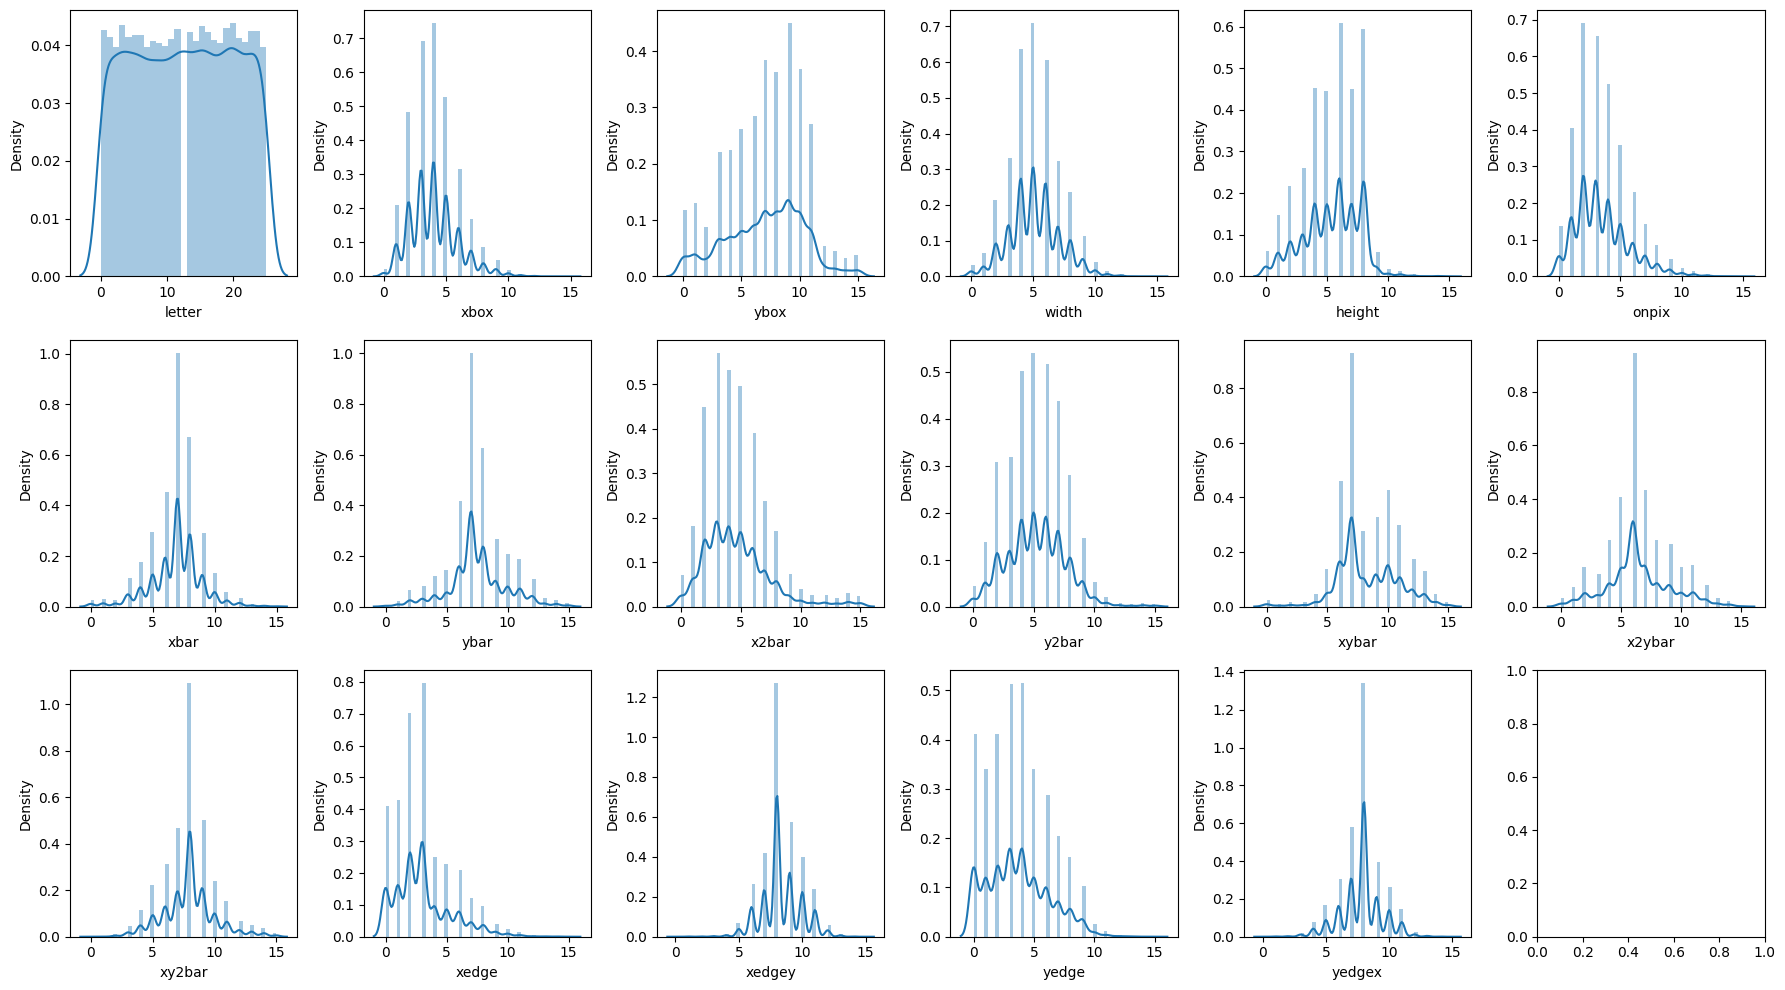

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Create a figure and axis object
fig, ax = plt.subplots(3, 6, figsize=(18, 10))
i = 0
j = 0
for col in data.columns:
    sns.distplot(data[col], hist=True, ax=ax[j, i])
    i += 1
    if i > 5:
        i = 0
        j += 1
plt.tight_layout()
plt.show()

#### Key Insights:

1. **Uniform distribution in 'letter'**: Most letters are evenly distributed, with a small dip in the middle.
2. **Multimodal distributions**: Features like 'xbox', 'ybox', 'width', and 'height' show multiple peaks, indicating distinct clusters or patterns in the data.
3. **Sharp central tendencies**: 'xbar', 'ybar', 'x2bar', and similar features have prominent peaks, suggesting common values occur frequently.

### Ploting Correlation matrix between variables

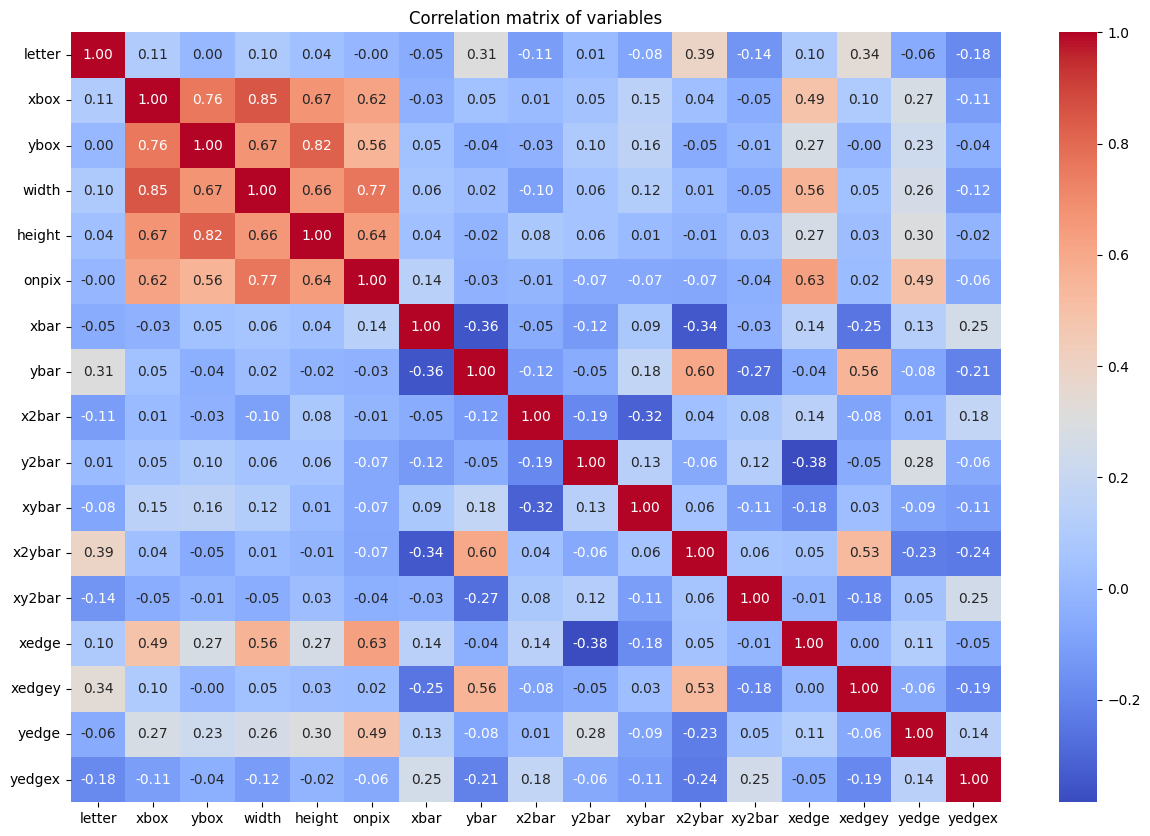

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_corr = data.corr()
plt.figure(figsize= [15,10])
sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation matrix of variables')
plt.show()

#### Key Insights from Correlation matrix
1. **Strong Positive Correlations**:
   - 'xbox' and 'width' (0.85): A high correlation indicates that as the 'xbox' increases, the 'width' also increases.
   - 'ybox' and 'height' (0.82): Similarly, a strong relationship where an increase in 'ybox' corresponds with an increase in 'height'.
   - 'onpix' and 'ybox' (0.77) and 'onpix' and 'width' (0.63): The number of on-pixels ('onpix') is closely related to the bounding box dimensions.
   
2. **Moderate Positive Correlations**:
   - 'xbar' and 'x2ybar' (0.60): Indicates a relationship between these features, though not as strong as others.
   - 'ybar' and 'onpix' (0.56): There is a moderate link between 'ybar' (average y-value) and the number of pixels.

3. **Negative Correlations**:
   - 'letter' and 'ybar' (-0.36): There is a negative correlation between the 'letter' feature and 'ybar', implying that as one increases, the other decreases.
   - 'x2bar' and 'xy2bar' (-0.32): Negative correlation, meaning these features move in opposite directions.

4. **Low or No Correlation**:
   - 'letter' shows minimal correlation with most features except 'ybar' (0.31) and 'x2ybar' (0.39).
   - 'xbar' and many other variables like 'ybar', 'x2bar', and 'x2ybar' show very weak or no correlation.

## 2: Model Implementation

In [30]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# Split the dataset into training and test sets
X = data_preprocessed.drop('letter', axis=1)  # Features
y = data_preprocessed['letter']  # Target variable

# Check the number of unique classes in the target
num_classes = len(y.unique())

# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert target labels to one-hot encoding based on the number of unique classes
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Create a sequential model
model = Sequential()

# Add a hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add an output layer with the number of neurons equal to the number of classes and softmax activation
model.add(Dense(num_classes, activation='sigmoid'))

# Compile the model with categorical crossentropy (for multiclass classification)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training set
model.fit(X_train, y_train_categorical, epochs=10, batch_size=32, verbose=2)

# Make predictions on the test set (output will be probabilities for each class)
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred_class = np.argmax(y_pred_prob, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
classification_report_str = classification_report(y_test, y_pred_class)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report_str}")


Epoch 1/10
500/500 - 2s - 3ms/step - accuracy: 0.4785 - loss: 1.9949
Epoch 2/10
500/500 - 1s - 2ms/step - accuracy: 0.7186 - loss: 1.0438
Epoch 3/10
500/500 - 1s - 2ms/step - accuracy: 0.7772 - loss: 0.8042
Epoch 4/10
500/500 - 1s - 2ms/step - accuracy: 0.8116 - loss: 0.6784
Epoch 5/10
500/500 - 1s - 3ms/step - accuracy: 0.8324 - loss: 0.5962
Epoch 6/10
500/500 - 1s - 2ms/step - accuracy: 0.8487 - loss: 0.5370
Epoch 7/10
500/500 - 1s - 2ms/step - accuracy: 0.8628 - loss: 0.4912
Epoch 8/10
500/500 - 1s - 2ms/step - accuracy: 0.8728 - loss: 0.4552
Epoch 9/10
500/500 - 1s - 2ms/step - accuracy: 0.8796 - loss: 0.4250
Epoch 10/10
500/500 - 1s - 2ms/step - accuracy: 0.8863 - loss: 0.4007
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
Accuracy: 0.884
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       149
           1       0.86      0.86      0.86       153
           2       0.92      0.91      0.91       137
          


**Insight:**
- The model achieved an accuracy of 88.4% on the test set.
- The classification report provides detailed precision, recall, and F1-score for each class.


## 3: Hyperparameter Tuning

In [32]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the ANN model
def create_ann_model(hidden_layers=1, neurons=16, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=16, activation=activation))
    
    for _ in range(hidden_layers):
        model.add(Dense(neurons, activation=activation))
        
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer for classification
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(model=create_ann_model, epochs=10, batch_size=32, verbose=0,random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'model__hidden_layers': [1, 2,3],
    'model__neurons': [32, 64, 128],
    'model__activation': ['relu', 'tanh'],
    'model__learning_rate': [0.0001, 0.001, 0.01],
}

# Use GridSearchCV for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_result.best_params_
best_score = grid_result.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'model__activation': 'tanh', 'model__hidden_layers': 3, 'model__learning_rate': 0.0001, 'model__neurons': 128}
Best Cross-Validation Score: 0.9395001792036449



**Insight:**
- The best parameters found are:
  - `model_hidden_layers`: 3
  - `model_activation`: 'tanh'
  - `model_learning_rate`: 0.0001
  - `model_neurons`: 128
- The best cross-validation score achieved is approximately 93.95%.


## 4: Evaluation

In [34]:
from sklearn.metrics import classification_report

# Get the best model from the grid search
best_model = grid_result.best_estimator_

# Fit the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)


# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)

print(f"Best Model Accuracy: {accuracy_best}")
print(f"Best Model Classification Report:\n{classification_report_best}")

Best Model Accuracy: 0.95425
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       149
           1       0.94      0.95      0.94       153
           2       0.96      0.96      0.96       137
           3       0.94      0.94      0.94       156
           4       0.90      0.94      0.92       141
           5       0.96      0.95      0.95       140
           6       0.97      0.95      0.96       160
           7       0.96      0.85      0.90       144
           8       0.99      0.91      0.95       146
           9       0.92      0.98      0.95       149
          10       0.89      0.88      0.89       130
          11       0.98      0.97      0.98       155
          12       0.95      0.98      0.96       168
          13       0.97      0.95      0.96       151
          14       0.94      0.95      0.95       145
          15       0.97      0.97      0.97       173
          16      


### **Insight:**



The performance differences between the model with default hyperparameters and the tuned model are significant, highlighting the impact of hyperparameter tuning on improving the performance of Artificial Neural Networks (ANNs). Here's a detailed comparison:

#### 1. **Accuracy**:
- **Default Model Accuracy**: 0.884
- **Tuned Model Accuracy**: 0.954

The accuracy of the model increased from 88.4% to 95.4% after hyperparameter tuning, representing a substantial improvement of 7%. This indicates that the tuning process significantly enhanced the model’s ability to correctly classify instances.

#### 2. **Loss**:
- **Default Model Loss**: The loss starts at 1.9949 in the first epoch and decreases to 0.4007 by the tenth epoch.
- **Tuned Model Loss**: Not explicitly mentioned, but given the higher accuracy, it's likely that the loss has decreased even further in the tuned model.

Lower loss is associated with better model performance, and the tuning likely optimized the model to minimize the loss more effectively.

#### 3. **Precision, Recall, and F1-Score**:
- **Default Model**:
  - Precision, recall, and F1-scores are generally strong, with some variation across classes.
  - For example, class 7 has lower performance metrics (precision: 0.91, recall: 0.67, F1: 0.77), indicating that the model struggles to classify instances from this category.
  
- **Tuned Model**:
  - All performance metrics have improved significantly, particularly in challenging classes like 7 (precision: 0.96, recall: 0.85, F1: 0.90).
  - The average precision, recall, and F1-scores are all consistently higher, leading to a more balanced and robust performance across all classes.

#### 4. **Class-Level Improvements**:
- For most classes, the precision, recall, and F1-scores have improved, with noticeable gains in specific classes:
  - **Class 7**: Recall jumped from 0.67 to 0.85, meaning the tuned model identifies more true positives in this class.
  - **Class 18**: F1-score increased from 0.81 to 0.98, indicating that the tuned model handles this class with near-perfect accuracy.

#### 5. **Macro and Weighted Average Scores**:
- **Default Model**:
  - Macro average for precision, recall, and F1-score is around 0.88.
  - Weighted average for precision, recall, and F1-score is also around 0.88.
  
- **Tuned Model**:
  - Both macro and weighted averages have increased to 0.95 and above, meaning the overall performance has improved across the board, with less variation between classes.

#### 6. **Impact of Hyperparameter Tuning**:
The improvements in the tuned model are the result of optimizing several key hyperparameters, such as:
- **Learning Rate**: Adjusting the learning rate ensures that the model converges efficiently without overshooting or taking too long.
- **Batch Size**: Changing the batch size can help in better gradient estimation and more stable updates.
- **Number of Neurons and Layers**: Increasing or decreasing the number of neurons in hidden layers can provide the model with enough capacity to learn complex patterns.
- **Activation Functions**: Optimizing activation functions can help the model capture nonlinear relationships.
- **Epochs and Early Stopping**: Finding the right number of epochs ensures the model doesn't overfit or underfit.

## Conclusion:
The hyperparameter tuning process led to significant improvements in the model's performance, enhancing both accuracy and the precision, recall, and F1-scores across almost all classes. These gains underscore the importance of optimizing hyperparameters in neural network models, as default settings may not always be well-suited to the data at hand. The tuned model is not only more accurate but also more balanced and generalizes better across different classes.

---
---
####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.